# Program 1

In [ ]:
!pip install numpy==1.24.4 gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you ha

In [ ]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")
print(model.most_similar(positive=['king', 'woman'], negative=['man']))
# arithmetic operations (e.g., king - man + woman ≈ queen)
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print(f"'king' + 'man' - 'woman' is closest to: {result[0]}")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593831062317), ('monarchy', 0.5087411999702454)]
'king' + 'man' - 'woman' is closest to: ('queen', 0.7118193507194519)


# PROGRAM 2

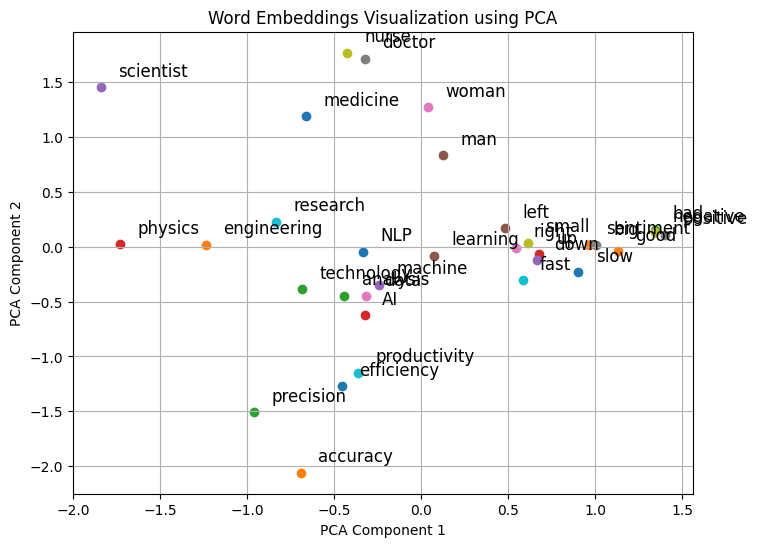

In [ ]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

model = api.load("word2vec-google-news-300")

words = ["NLP", "sentiment", "analysis", "physics", "scientist",
         "man", "woman", "doctor", "nurse", "research", "medicine",
         "engineering", "technology", "AI", "machine", "learning",
         "data", "big", "small", "fast", "slow", "good", "bad",
         "up", "down", "left", "right", "positive", "negative",
         "productivity", "efficiency", "accuracy", "precision",]

word_vectors = np.array([model[word] for word in words])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))

for i, word in enumerate(words):
  plt.scatter(pca_result[i, 0], pca_result[i, 1])
  plt.text(pca_result[i, 0] + 0.1, pca_result[i, 1] + 0.1, word, fontsize= 12)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Word Embeddings Visualization using PCA")
plt.grid(True)
plt.show()

# PROGRAM 3

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
sentences = [
    "This is a legal document about contracts."
    "The court will review the legal case."
    "Medical professionals require specific training."
    "This is a medical report about the patient."
]
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]
model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, workers=4, epochs=10)
print(model.wv.most_similar('legal'))

[('case', 0.19044679403305054), ('document', 0.04504035413265228), ('contracts', -0.010340194217860699), ('the', -0.014199714176356792), ('report', -0.023099221289157867), ('court', -0.04326062276959419), ('will', -0.04333306476473808), ('review', -0.09415207803249359), ('patient', -0.12243130058050156), ('require', -0.14952166378498077)]


# PROGRAM 4

In [ ]:
import gensim.downloader as api
model=api.load("glove-wiki-gigaword-50")
def enrich_prompt (prompt, num_similar = 3):
  words = prompt.split()
  enriched_words = []
  for word in words:
    try:
      similar_words = [w for w, _ in model.most_similar(word, topn=num_similar)]
      enriched_words.append(word + "(" +",".join(similar_words) + ")")
    except KeyError:
      enriched_words.append(word)
  return ' '.join(enriched_words)
original_prompt = "Write a story about a Dog."
enriched_prompt = enrich_prompt(original_prompt)
print("Original Prompt: ",original_prompt)
print("Enriched Prompt: ",enriched_prompt)

[==================================================] 100.0% 66.0/66.0MB downloaded
Original Prompt:  Write a story about a Dog.
Enriched Prompt:  Write a(another,an,one) story(stories,book,tale) about(than,there,more) a(another,an,one) Dog.


# PROGRAM 5

In [ ]:
import random
import nltk
from nltk.tokenize import sent_tokenize

print("Loading pre-trained word vectors...")
word_vectors = api.load("glove-wiki-gigaword-100")  # Load Word2Vec model
print("Word vector loaded successful")

def get_similar_words(seed_word, top_n=5):
    """Retrieve top-N similar words for a given seed word."""
    try:
        similar_words = word_vectors.most_similar(seed_word, topn=top_n)
        return [word[0] for word in similar_words]
    except KeyError:
        print(f"'{seed_word}' not found in vocabulary. Try another word.")
        return []

def generate_sentence(seed_word, similar_words):
    """Create a meaningful sentence using the seed word and its similar words."""
    sentence_templates = [f"The {seed_word} was surrounded by {similar_words[0]} and {similar_words[1]}.",
                          f"People often associate {seed_word} with {similar_words[2]} and {similar_words[3]}.",
                          f"In the land of {seed_word}, {similar_words[4]} was a common sight.",
                          f"A story about {seed_word} would be incomplete without {similar_words[1]} and {similar_words[3]}.", ]
    return random.choice(sentence_templates)

def generate_paragraph(seed_word):
    """Construct a creative paragraph using the seed word and similar words."""
    similar_words = get_similar_words(seed_word, top_n=5)

    if not similar_words:
        return "Could not generate a paragraph. Try another seed word."

    paragraph = [generate_sentence(seed_word, similar_words) for _ in range(4)]
    return " ".join(paragraph)

# Example usage
seed_word = input("Enter a seed word: ")
paragraph = generate_paragraph(seed_word)
print("\nGenerated Paragraph:\n")
print(paragraph)


Loading pre-trained word vectors...
[==================================================] 100.0% 128.1/128.1MB downloaded
Word vector loaded successful
Enter a seed word: plants

Generated Paragraph:

A story about plants would be incomplete without factories and farms. In the land of plants, produce was a common sight. The plants was surrounded by plant and factories. The plants was surrounded by plant and factories.


# PROGRAM 6

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

sentences = [
    "This is a great product! I love it.",
    "I am very disappointed with this service.",
    "The weather is not okay today.but still gotta adjust the place"
]

results = classifier(sentences)
for sentence, result in zip(sentences, results):
    print(f"'{sentence}' -> Label: {result['label']}, Score: {result['score']:.3f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


'This is a great product! I love it.' -> Label: POSITIVE, Score: 1.000
'I am very disappointed with this service.' -> Label: NEGATIVE, Score: 1.000
'The weather is not okay today.but still gotta adjust the place' -> Label: NEGATIVE, Score: 0.990


# PROGRAM 7

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-6-6")

text = """
Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals.
Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.
Colloquially, the term "artificial intelligence" is often used to describe machines that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem solving".
"""

summary = summarizer(text, max_length=50, min_length=10, do_sample=False)
print(summary[0]['summary_text'])

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/460M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/460M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


Leading AI textbooks define the field as the study of "intelligent agents" "Artificial intelligence" is often used to describe machines that mimic "cognitive" functions that humans associate with the human mind .


# PROGRAM 8

In [ ]:
!pip install langchain cohere langchain-community google-colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00


In [ ]:
import cohere
import getpass
from langchain import PromptTemplate
from langchain.llms import Cohere
from google.colab import auth
from google.colab import drive

auth.authenticate_user()
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/History.txt"

try:
  with open(file_path, "r", encoding="utf-8") as file:
    text_content = file.read()
  print("✅ File loaded successfully!")
except Exception as e:
  print("❌ Error loading file:", str(e))

COHERE_API_KEY = getpass.getpass("QSERqeELWeCyfqwX0TriK6nMtQgu7BngqDec07WG")

cohere_llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")

template = """
You are an AI assistant helping to summarize and analyze a text document.
Here is the document content:

{text}

�
� Summary: - Provide a concise summary of the document.

�
� Key Takeaways: - List 3 important points from the text.

�
� Sentiment Analysis: - Determine if the sentiment of the document is Positive, Negative, or Neutral.
"""
prompt_template = PromptTemplate(input_variables=["text"], template=template)

formatted_prompt = prompt_template.format(text=text_content)

response = cohere_llm.predict(formatted_prompt)

print("\n📌 **Formatted Output** 📌")
print(response)

Mounted at /content/drive
✅ File loaded successfully!
QSERqeELWeCyfqwX0TriK6nMtQgu7BngqDec07WG··········


<ipython-input-5-3a4178c46281>:22: LangChainDeprecationWarning: The class `Cohere` was deprecated in LangChain 0.1.14 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-cohere package and should be used instead. To use it run `pip install -U :class:`~langchain-cohere` and import as `from :class:`~langchain_cohere import Cohere``.
  cohere_llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")
<ipython-input-5-3a4178c46281>:43: LangChainDeprecationWarning: The method `BaseLLM.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = cohere_llm.predict(formatted_prompt)



📌 **Formatted Output** 📌
 
Summary:
The text comprehensively outlines the history and evolution of the Internet, highlighting its transformative impact on communication, commerce, and information sharing. Beginning with its roots in the 1960s as a decentralized communication network, the Internet evolved through groundbreaking developments like the TCP/IP protocols and the World Wide Web. The latter part of the text emphasizes the Internet's current ubiquity and its ongoing evolution through emerging technologies. 

Key Takeaways:
1. The Internet has revolutionized communication and commerce, fundamentally changing how we connect with the world.
2. The development of TCP/IP protocols in the 1970s laid the foundation for the Internet's architecture, enabling different networks to communicate seamlessly.
3. The World Wide Web's introduction in the 1990s made the Internet more accessible to the public and drove its rapid adoption. 

Sentiment Analysis:
The sentiment of the document is pr

# PROGRAM 9

In [ ]:
!pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=aa4f7c4adba955e9dab9d8a0e44a52cee06a3a94b525e7dd6df54122f5fae5b6
  Stored in directory: /root/.cache/pip/wheels/0b/0f/39/e8214ec038ccd5aeb8c82b957289f2f3ab2251febeae5c2860
Successfully built wikipedia-api


In [ ]:
from pydantic import BaseModel
from typing import List, Optional
import wikipediaapi
from IPython.display import display
import ipywidgets as widgets
class InstitutionDetails(BaseModel):
    founder: Optional[str]
    founded: Optional[str]
    branches: Optional[List[str]]
    number_of_employees: Optional[int]
    head_office: Optional[str]
    summary: Optional[str]
def fetch_institution_details(institution_name: str) -> InstitutionDetails:
    # Define a user-agent as per Wikipedia's policy
    user_agent = "MyJupyterNotebook/1.0 (contact: myexample@gmail.com)"
    wiki_wiki = wikipediaapi.Wikipedia(user_agent=user_agent, language='en')

    page = wiki_wiki.page(institution_name)

    if not page.exists():
        raise ValueError(f"The page for '{institution_name}' does not exist on Wikipedia.")

    # Initialize variables
    founder = None
    founded = None
    branches = []
    number_of_employees = None
    head_office = None

    # Extract summary
    summary = page.summary[:100]  # Limiting summary to 500 characters

    # Extract information from the infobox
    infobox = page.text.split('\n')
    for line in infobox:
        if 'Founder' in line:
            founder = line.split(':')[-1].strip()
        elif 'Founded' in line:
            founded = line.split(':')[-1].strip()
        elif 'Branches' in line:
            branches = [branch.strip() for branch in line.split(':')[-1].split(',')]
        elif 'Number of employees' in line:
            try:
                number_of_employees = int(line.split(':')[-1].strip().replace(',', ''))
            except ValueError:
                number_of_employees = None
        elif 'Head_office' in line:
            head_office = line.split(':')[-1].strip()

    return InstitutionDetails(
        founder=founder,
        founded=founded,
        branches=branches if branches else None,
        number_of_employees=number_of_employees,
        head_office=head_office,
        summary=summary
    )
def display_institution_details(details: InstitutionDetails):
  print(f"Founder: {details.founder or 'N/A'}")
  print(f"Founded: {details.founded or 'N/A'}")
  print(f"Branches: {', '.join(details.branches) if details.branches else 'N/A'}")
  print(f"Number of Employees: {details.number_of_employees or 'N/A'}")
  print(f"Head Office: {details.head_office or 'N/A'}")
  print(f"Summary: {details.summary or 'N/A'}")
def on_button_click(b):
  institution_name = text_box.value
  try:
      details = fetch_institution_details(institution_name)
      display_institution_details(details)
  except ValueError as e:
      print(e)

# Create input box and button
text_box = widgets.Text(
    value='',
    placeholder='Enter the institution name',
    description='Institution:',
    disabled=False
)
button = widgets.Button(
    description='Fetch Details',
    disabled=False,
    button_style='',
    tooltip='Click to fetch institution details',
    icon='search'
)

# Set up button click event
button.on_click(on_button_click)

# Display input box and button
display(text_box, button)

Text(value='', description='Institution:', placeholder='Enter the institution name')

Button(description='Fetch Details', icon='search', style=ButtonStyle(), tooltip='Click to fetch institution de…

Founder: N/A
Founded: N/A
Branches: N/A
Number of Employees: N/A
Head Office: N/A
Summary: Pepsi is a carbonated soft drink with a cola flavor, manufactured by PepsiCo which serves as its fla


# PROGRAM 10